![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Construcción e implementación de árboles de decisión y métodos de ensamblaje

En este taller podrá poner en práctica los sus conocimientos sobre construcción e implementación de árboles de decisión y métodos de ensamblajes. El taller está constituido por 9 puntos, 5 relacionados con árboles de decisión (parte A) y 4 con métodos de ensamblaje (parte B).

## Parte A - Árboles de decisión

En esta parte del taller se usará el conjunto de datos de Capital Bikeshare de Kaggle, donde cada observación representa el alquiler de bicicletas durante una hora y día determinado. Para más detalles puede visitar los siguientes enlaces: [datos](https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip), [dicccionario de datos](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset#).

### Datos prestamo de bicicletas

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [77]:
# Importación de librerías
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, f1_score

In [3]:
# Lectura de la información de archivo .csv
bikes = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/bikeshare.csv', index_col='datetime', parse_dates=True)

# Renombrar variable "count" a "total"
bikes.rename(columns={'count':'total'}, inplace=True)

# Crear la hora como una variable
bikes['hour'] = bikes.index.hour

# Visualización de los datos
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


### Punto 1 - Análisis descriptivo

Ejecute las celdas 1.1 y 1.2. A partir de los resultados realice un análisis descriptivo sobre las variables "season" y "hour", escriba sus inferencias sobre los datos. Para complementar su análisis puede usar métricas como máximo, mínimo, percentiles entre otros.

In [4]:
#-------------------
# Celda 1.1
#-------------------
#Total por temporada - promedio
bikes.groupby('season').total.mean()

season
1    116.343261
2    215.251372
3    234.417124
4    198.988296
Name: total, dtype: float64

In [8]:
#Total por temporada - mediana
bikes.groupby('season').total.median()

season
1     78.0
2    172.0
3    195.0
4    161.0
Name: total, dtype: float64

In [10]:
#Total por temporada - recuento/moda
bikes.groupby('season').total.count()

season
1    2686
2    2733
3    2733
4    2734
Name: total, dtype: int64

In [6]:
#Total por temporada - máximo
bikes.groupby('season').total.max()

season
1    801
2    873
3    977
4    948
Name: total, dtype: int64

In [7]:
#Total por temporada - mínimo
bikes.groupby('season').total.min()

season
1    1
2    1
3    1
4    1
Name: total, dtype: int64

In [12]:
bikes.groupby('season').total.std()

season
1    125.273974
2    192.007843
3    197.151001
4    177.622409
Name: total, dtype: float64

In [11]:
bikes.groupby('season').total.describe()

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
1,2686.0,116.343261,125.273974,1.0,24.0,78.0,164.0,801.0
2,2733.0,215.251372,192.007843,1.0,49.0,172.0,321.0,873.0
3,2733.0,234.417124,197.151001,1.0,68.0,195.0,347.0,977.0
4,2734.0,198.988296,177.622409,1.0,51.0,161.0,294.0,948.0


## Inferencia análisis exploratorio Temporadas:

Como se puede apreciar en el análisis exploratorio de temporadas la moda se encuentra levemente concentrada en la temporada número cuatro siendo esta otoño, seguida de la temporada 3 (verano) y la temporada 2 (primavera). El promedio de cada una de las temporadas se centra en 116 para la temporada uno 215 para la temporada 2, 234 para la temporada 3 y 198 para la temporada cuatro mostrando una mayor desviación de los datos y una mayor dispersión de estos la temporada 3 seguida de la temporada 2 y una mayor concentración alrededor de la media para la temporada uno y la temporada cuatro.

Todas ellas presentan un mínimo de rentas por temporada de uno y un máximo de rentas por temporada más alto en el verano que en las otras temporadas disponibles seguido del otoño con 948 como máximo en esta temporada.
En cuanto a los percentiles gran parte de esto se concentra en alrededor del 50% siendo bastante cercanos a este 50% del promedio en la temporada cuatro y más alejado en la temporada uno esta última se concentra mucho más en su media entre el presente y el 50 y el percentil 75.


In [5]:
#-------------------
# Celda 1.2
#-------------------
#Total por hora - promedio
bikes.groupby('hour').total.mean()

hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: total, dtype: float64

In [35]:
#Total por hora - promedio
bikes.groupby('hour').total.median()

hour
0      41.0
1      19.0
2      11.0
3       6.0
4       6.0
5      19.0
6      75.0
7     208.0
8     392.0
9     217.0
10    149.0
11    183.0
12    234.5
13    226.5
14    212.0
15    232.0
16    309.5
17    480.5
18    422.5
19    312.5
20    224.0
21    171.5
22    129.0
23     80.0
Name: total, dtype: float64

In [36]:
#Total por hora - promedio
bikes.groupby('hour').total.count()

hour
0     455
1     454
2     448
3     433
4     442
5     452
6     455
7     455
8     455
9     455
10    455
11    455
12    456
13    456
14    456
15    456
16    456
17    456
18    456
19    456
20    456
21    456
22    456
23    456
Name: total, dtype: int64

In [37]:
#Total por hora - promedio
bikes.groupby('hour').total.max()

hour
0     283
1     168
2     119
3      66
4      28
5      57
6     213
7     596
8     839
9     414
10    539
11    647
12    757
13    729
14    730
15    724
16    783
17    970
18    977
19    743
20    551
21    584
22    502
23    256
Name: total, dtype: int64

In [38]:
#Total por hora - promedio
bikes.groupby('hour').total.min()

hour
0      2
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      8
9     14
10    17
11    10
12     3
13    11
14    12
15     7
16    11
17    15
18    23
19    11
20    11
21     6
22     9
23     4
Name: total, dtype: int64

In [39]:
#Total por hora - promedio
bikes.groupby('hour').total.std()

hour
0      43.620012
1      34.112105
2      26.110267
3      12.666442
4       4.217633
5      12.784293
6      54.745333
7     159.207044
8     231.723065
9      92.099209
10    101.807629
11    127.444294
12    143.881880
13    149.167185
14    147.563199
15    144.235670
16    145.664786
17    223.775485
18    219.908138
19    156.641732
20    116.411565
21     87.629319
22     69.844495
23     51.638004
Name: total, dtype: float64

In [40]:
#Total por hora - promedio
bikes.groupby('hour').total.describe()

,count,mean,std,min,25%,50%,75%,max
hour,,,,,,,,
0,455.0,55.138462,43.620012,2.0,24.00,41.0,74.50,283.0
1,454.0,33.859031,34.112105,1.0,11.00,19.0,46.00,168.0
2,448.0,22.899554,26.110267,1.0,5.00,11.0,32.00,119.0
3,433.0,11.757506,12.666442,1.0,3.00,6.0,15.00,66.0
4,442.0,6.407240,4.217633,1.0,3.00,6.0,9.00,28.0
5,452.0,19.767699,12.784293,1.0,8.00,19.0,29.00,57.0
6,455.0,76.259341,54.745333,1.0,24.50,75.0,118.00,213.0
7,455.0,213.116484,159.207044,1.0,63.00,208.0,334.00,596.0
8,455.0,362.769231,231.723065,8.0,133.50,392.0,563.50,839.0


## Inferencia análisis exploratorio Horas del Dia:

En cuanto al análisis exploratorio por horas encontramos una concentración de registros (o moda) bastante homogénea entre las diferentes horas que componen nuestra muestra. En cuanto al promedio de rentas si vemos un incremento gradual desde la hora más temprana (00:00am) y va incrementando paulatinamente a medida que transcurre el día alcanzando un máximo promedio en las 17:00 del día. El análisis de mínimos de rentas también presenta una tendencia similar en la que el mínimo de rentas va incrementando a medida que transcurre el día siendo las horas de la tarde o tarde en la mañana donde alcanza niveles por encima de las 10 rentas promedio. En el análisis de máximos presenta una tendencia similar alcanzando las 757 rentas alrededor de las 12:00 del día como máximo y una concentración alrededor de la media (desviación estándar) bastante dispersa.
Así mismo, a medida que se que avanza el día la concentración de la media para las diferentes horas en este caso se concentra más hacia percentil 50 sugiriendo una distribución bastante homogénea de diferentes rentas alrededor de estas horas analizadas.


### Punto 2 - Análisis de gráficos

Primero ejecute la celda 2.1 y asegúrese de comprender el código y el resultado. Luego, en cada una de celdas 2.2 y 2.3 escriba un código que genere una gráfica del número de bicicletas rentadas promedio para cada valor de la variable "hour" (hora) cuando la variable "season" es igual a 1 (invierno) e igual a 3 (verano), respectivamente. Analice y escriba sus hallazgos.

<Axes: xlabel='hour'>

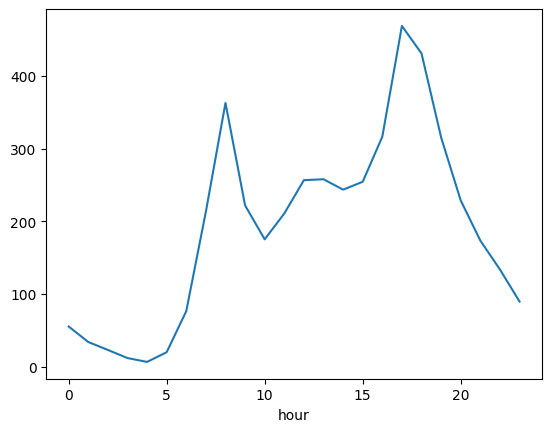

In [19]:
#-------------------
# Celda 2.1 - rentas promedio para cada valor de la variable "hour"
#-------------------
bikes.groupby('hour').total.mean().plot()

<Axes: xlabel='hour'>

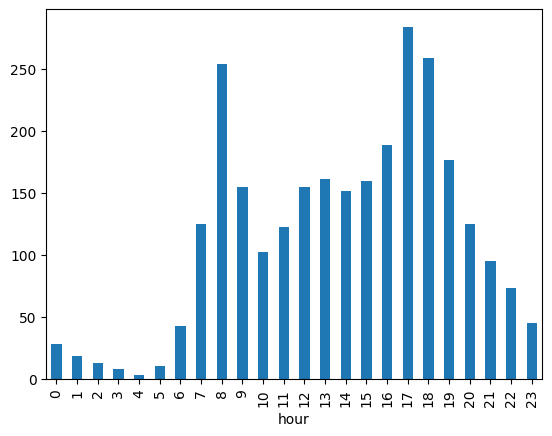

In [24]:
#-------------------
# Celda 2.2 - "season"=1 escriba su código y hallazgos
#-------------------
bikes[bikes['season'] == 1].groupby('hour').total.mean().plot.bar()

<Axes: xlabel='hour'>

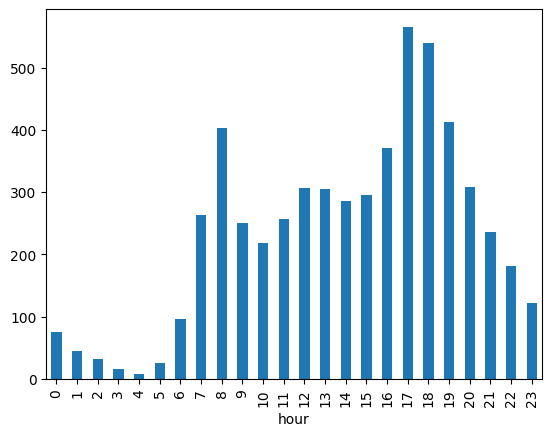

In [20]:
#-------------------
# Celda 2.3 - "season"=3 escriba su código y hallazgos
#-------------------
bikes[bikes['season'] == 3].groupby('hour').total.mean().plot.bar()

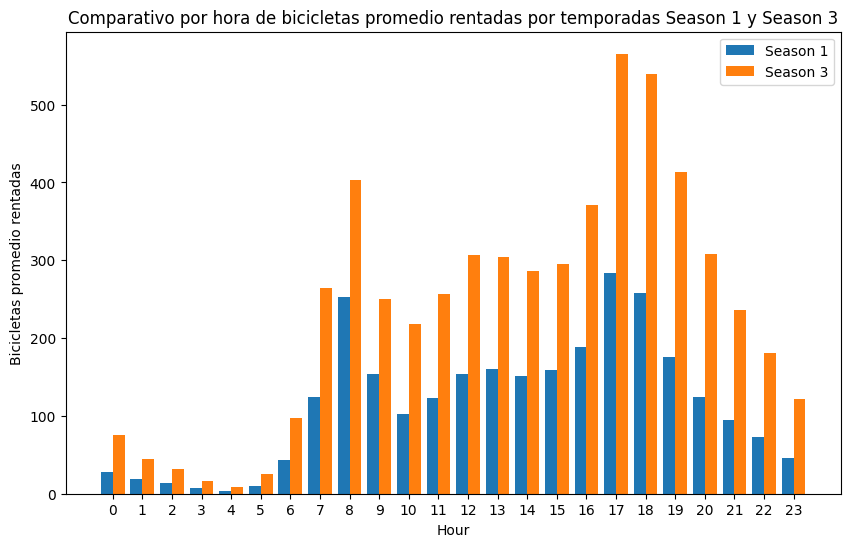

In [34]:
season1_data = bikes[bikes['season'] == 1]
season1_hourly_mean = season1_data.groupby('hour')['total'].mean()

season3_data = bikes[bikes['season'] == 3]
season3_hourly_mean = season3_data.groupby('hour')['total'].mean()

plt.figure(figsize=(10, 6))
plt.bar(season1_hourly_mean.index - 0.2, season1_hourly_mean.values, width=0.4, label='Season 1')
plt.bar(season3_hourly_mean.index + 0.2, season3_hourly_mean.values, width=0.4, label='Season 3')

plt.xlabel('Hour')
plt.ylabel('Bicicletas promedio rentadas')
plt.title('Comparativo por hora de bicicletas promedio rentadas por temporadas Season 1 y Season 3')
plt.xticks(range(24))
plt.legend()

plt.show()

In [29]:
season1_data = bikes[bikes['season'] == 1]
season1_hourly_mean = season1_data.groupby('hour')['total'].mean().reset_index()
season1_hourly_mean.columns = ['hour', 'promedioPorHora_season_1']

season3_data = bikes[bikes['season'] == 3]
season3_hourly_mean = season3_data.groupby('hour')['total'].mean().reset_index()
season3_hourly_mean.columns = ['hour', 'promedioPorHora_season_3']

merged_table = pd.merge(season1_hourly_mean, season3_hourly_mean, on='hour', how='outer')
merged_table

,hour,promedioPorHora_season_1,promedioPorHora_season_3
0,0,28.292035,75.675439
1,1,18.761062,44.831858
2,2,13.205607,31.707965
3,3,7.760417,15.778761
4,4,3.336634,8.087719
5,5,10.300000,25.728070
6,6,42.725664,96.780702
7,7,124.433628,264.035088
8,8,253.345133,403.508772
9,9,154.442478,250.710526


## Análisis comportamiento de las rentas por temporada y horas del dia:

Como es posible apreciar en ambas temporadas la concentración de rentas se da en horas de la tarde en la noche alcanzando su pico alrededor de las 5:00pm, sin embargo hay una diferencia marcada entre la temporada 1 (invierno) y la temporada 3 (verano) donde el máximo en invierno está alrededor de las 300 rentas promedio y el máximo en verano alrededor de las 5:00 de la tarde está por encima de las 500 rentas promedio. Lo anterior, tiene sentido por situaciones climáticas y duración agregada de la luz solar y de luz de día para poder disfrutar de actividades como andar en bicicleta alrededor de la ciudad, así mismo, es importante resaltar que, la tendencia si bien es más alta en las rentas promedio en la temporada 3 parece ser que en temporada 1 se mantienen comportamientos de renta cíclicos y predecibles, que alcanzan picos en la mañana alrededor de las 8:00 de la mañana y después vuelven a caer levemente para reactivar y alcanzar pico alrededor de las 5:00 de la tarde.

### Punto 3 - Regresión lineal
En la celda 3 ajuste un modelo de regresión lineal a todo el conjunto de datos, utilizando "total" como variable de respuesta y "season" y "hour" como las únicas variables predictoras, teniendo en cuenta que la variable "season" es categórica. Luego, imprima los coeficientes e interprételos. ¿Cuáles son las limitaciones de la regresión lineal en este caso?

In [72]:
#-------------------
# Celda 3
#-------------------
X = bikes[['season', 'hour']]
y = bikes['total']

X['season'] = pd.factorize(X.season)[0]

model = LinearRegression()
model.fit(X, y)

intercept = model.intercept_
coefficients = model.coef_

print("Intercept:", intercept)
print("Coefficient for season:", coefficients[0])
print("Coefficient for hour:", coefficients[1])

#dividiendo la muestra para calcular el mse y poder comparar
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

print("Training MSE:", mse_train)
print("Testing MSE:", mse_test)

Intercept: 29.536159845355115
Coefficient for season: 26.951308510673893
Coefficient for hour: 10.52129823657616
Training MSE: 26575.517125988925
Testing MSE: 26898.274894466886


##Limitaciones Regresión Lineal:

Al ajustar los datos a un modelo de regresión lineal teniendo en cuenta que la variable hora es categórica presentamos una serie de complicaciones o limitaciones.
Como primera medida, sería importante procesar la la variable categórica con el fin de darle un rol más apropiado dentro de una regresión lineal ya que, la interpretación de su coeficiente no está alineada con lo que los valores de cada una de las estaciones representan. A manera de ejemplo, el cuatro es el valor asignado al otoño y cómo no está ordenado en magnitud vs lo que estamos viendo contra otras temporadas (como el verano) la temporada, la luz de día y la temperatura asociadas a estas impacta directamente proporcional a las rentas, impactando más en verano que en otoño siendo esta la temporada que tiene el coeficiente más alto asignado dentro de las variables categóricas.
Adicionalmente hay que tener en cuenta que el modelo de regresión lineal en sí mismo tiene unas limitaciones generales, siendo la primera de ellas siendo el supuesto de linealidad. Esta relación entre variables predictores y variables de respuesta puede no ser lineal y bajo el modelo de regresión lineal estamos asumiendo que la relación siempre va a ser en expresada en una línea recta lo cual sesga el modelo e incrementa su varianza limitando su poder explicativo y predictivo.
Así mismo, tenemos los supuestos de independencia que argumenta que hay independencia de los errores detrás de este modelo de regresión lineal un supuesto de independencia de los errores que pueden no cumplirse si hay autocorrelación entre los datos. También el supuesto de homocedasticidad en el que asumimos que la varianza de los errores es constante y esto puede no ser cierto dependiendo del grupo de datos o el portafolio de datos que estamos utilizando dentro de las variables predictores.
Un supuesto adicional es el de normalidad de los errores, esa distribución de errores puede no ser normal haciendo también que el modelo que es sesgado.


### Punto 4 - Árbol de decisión manual
En la celda 4 cree un árbol de decisiones para pronosticar la variable "total" iterando **manualmente** sobre las variables "hour" y  "season". El árbol debe tener al menos 6 nodos finales.

In [45]:
#-------------------
# Celda 4
#-------------------
# Definición de la función que calcula el gini index
def gini(y):
    if y.shape[0] == 0:
        return 0
    else:
        return 1 - (y.mean()**2 + (1 - y.mean())**2)

# Definición de la función gini_imputiry para calular la ganancia de una variable predictora j dado el punto de corte k
def gini_impurity(X_col, y, split):

    filter_l = X_col < split
    y_l = y.loc[filter_l]
    y_r = y.loc[~filter_l]

    n_l = y_l.shape[0]
    n_r = y_r.shape[0]

    gini_y = gini(y)
    gini_l = gini(y_l)
    gini_r = gini(y_r)

    gini_impurity_ = gini_y - (n_l / (n_l + n_r) * gini_l + n_r / (n_l + n_r) * gini_r)

    return gini_impurity_

# Definición de la función best_split para calcular cuál es la mejor variable y punto de cortepara hacer la bifurcación del árbol
def best_split(X, y, num_pct=10):

    features = range(X.shape[1])

    best_split = [0, 0, 0]  # j, split, gain

    # Para todas las varibles
    for j in features:

        splits = np.percentile(X.iloc[:, j], np.arange(0, 100, 100.0 / (num_pct+1)).tolist())
        splits = np.unique(splits)[1:]

        # Para cada partición
        for split in splits:
            gain = gini_impurity(X.iloc[:, j], y, split)

            if gain > best_split[2]:
                best_split = [j, split, gain]

    return best_split

# Definición de la función tree_grow para hacer un crecimiento recursivo del árbol
def tree_grow(X, y, level=0, min_gain=0.001, max_depth=None, num_pct=10):

    # Si solo es una observación
    if X.shape[0] == 1:
        tree = dict(y_pred=y.iloc[:1].values[0], y_prob=0.5, level=level, split=-1, n_samples=1, gain=0)
        return tree

    # Calcular la mejor división
    j, split, gain = best_split(X, y, num_pct)

    # Guardar el árbol y estimar la predicción
    y_pred = int(y.mean() >= 0.5)
    y_prob = (y.sum() + 1.0) / (y.shape[0] + 2.0)  # Corrección Laplace

    tree = dict(y_pred=y_pred, y_prob=y_prob, level=level, split=-1, n_samples=X.shape[0], gain=gain)
    # Revisar el criterio de parada
    if gain < min_gain:
        return tree
    if max_depth is not None:
        if level >= max_depth:
            return tree

    # Continuar creando la partición
    filter_l = X.iloc[:, j] < split
    X_l, y_l = X.loc[filter_l], y.loc[filter_l]
    X_r, y_r = X.loc[~filter_l], y.loc[~filter_l]
    tree['split'] = [j, split]

    # Siguiente iteración para cada partición

    tree['sl'] = tree_grow(X_l, y_l, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct)
    tree['sr'] = tree_grow(X_r, y_r, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct)

    return tree

tree = tree_grow(X, y, level=0, min_gain=0.001, num_pct=10)
tree

{'y_pred': 1,
 'y_prob': 191.53903379867745,
 'level': 0,
 'split': [1, 8.0],
 'n_samples': 10886,
 'gain': 18268.811823533004,
 'sl': {'y_pred': 1,
  'y_prob': 55.40711902113459,
  'level': 1,
  'split': [1, 7.0],
  'n_samples': 3594,
  'gain': 7207.700659959655,
  'sl': {'y_pred': 1,
   'y_prob': 32.561604584527224,
   'level': 2,
   'split': [1, 6.0],
   'n_samples': 3139,
   'gain': 646.8008927589567,
   'sl': {'y_pred': 1,
    'y_prob': 25.15934475055845,
    'level': 3,
    'split': [1, 2.0],
    'n_samples': 2684,
    'gain': 382.8088308604629,
    'sl': {'y_pred': 1,
     'y_prob': 44.41383095499451,
     'level': 4,
     'split': [0, 2.0],
     'n_samples': 909,
     'gain': 291.4004681825131,
     'sl': {'y_pred': 1,
      'y_prob': 23.32456140350877,
      'level': 5,
      'split': [1, 1.0],
      'n_samples': 226,
      'gain': 45.41972746495435,
      'sl': {'y_pred': 1,
       'y_prob': 27.808695652173913,
       'level': 6,
       'split': -1,
       'n_samples': 113,
 

### Punto 5 - Árbol de decisión con librería
En la celda 5 entrene un árbol de decisiones con la **librería sklearn**, usando las variables predictoras "season" y "hour" y calibre los parámetros que considere conveniente para obtener un mejor desempeño. Recuerde dividir los datos en conjuntos de entrenamiento y validación para esto. Comente el desempeño del modelo con alguna métrica de desempeño de modelos de regresión y compare desempeño con el modelo del punto 3.

In [70]:
#-------------------
# Celda 5
#-------------------
# Extract predictor variables and response variable
X = bikes[['season', 'hour']]
y = bikes['total']

# Split the data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Instantiate the decision tree regressor
tree_reg = DecisionTreeRegressor(random_state=42)

# Grid search with cross-validation
grid_search = GridSearchCV(tree_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best model
best_tree_reg = grid_search.best_estimator_

# Evaluate the best model on validation set
y_pred = best_tree_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

# Print the performance metrics
print("Best model parameters:", grid_search.best_params_)
print("Validation set Mean Squared Error:", mse)

Best model parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Validation set Mean Squared Error: 13453.850948446416


#Comparación frente a regresión lineal:

Es evidente el mejor desemepeño del arbol de decisión vs la regresión lineal.

Empleando el MSE como metrica de comparación encontramos un MSE mucho menor en la validación del arbol de decisión (13453.85) vs la regresión lineal (26898.27) haciendo que el árbol de decisión sea el preferido al analizar por esta métrica ya que tiene mejor capacidad predictiva con menor error asociado.

## Parte B - Métodos de ensamblajes
En esta parte del taller se usará el conjunto de datos de Popularidad de Noticias Online. El objetivo es predecir si la notica es popular o no, la popularidad está dada por la cantidad de reacciones en redes sociales. Para más detalles puede visitar el siguiente enlace: [datos](https://archive.ics.uci.edu/ml/datasets/online+news+popularity).

### Datos popularidad de noticias

In [73]:
# Lectura de la información de archivo .csv
df = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/mashable.csv', index_col=0)
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Popular
0,http://mashable.com/2014/12/10/cia-torture-rep...,28.0,9.0,188.0,0.732620,1.0,0.844262,5.0,1.0,1.0,...,0.200000,0.80,-0.487500,-0.60,-0.250000,0.9,0.8,0.4,0.8,1
1,http://mashable.com/2013/10/18/bitlock-kicksta...,447.0,7.0,297.0,0.653199,1.0,0.815789,9.0,4.0,1.0,...,0.160000,0.50,-0.135340,-0.40,-0.050000,0.1,-0.1,0.4,0.1,0
2,http://mashable.com/2013/07/24/google-glass-po...,533.0,11.0,181.0,0.660377,1.0,0.775701,4.0,3.0,1.0,...,0.136364,1.00,0.000000,0.00,0.000000,0.3,1.0,0.2,1.0,0
3,http://mashable.com/2013/11/21/these-are-the-m...,413.0,12.0,781.0,0.497409,1.0,0.677350,10.0,3.0,1.0,...,0.100000,1.00,-0.195701,-0.40,-0.071429,0.0,0.0,0.5,0.0,0
4,http://mashable.com/2014/02/11/parking-ticket-...,331.0,8.0,177.0,0.685714,1.0,0.830357,3.0,2.0,1.0,...,0.100000,0.55,-0.175000,-0.25,-0.100000,0.0,0.0,0.5,0.0,0


In [74]:
# Definición variable de interes y variables predictoras
X = df.drop(['url', 'Popular'], axis=1)
y = df['Popular']
y.mean()

0.5

In [75]:
# División de la muestra en set de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Punto 6 - Árbol de decisión y regresión logística
En la celda 6 construya un árbol de decisión y una regresión logística. Para el árbol calibre al menos un parámetro y evalúe el desempeño de cada modelo usando las métricas de Accuracy y F1-Score.

Decision Tree Classifier:
Best max_depth: 4
Best Accuracy: 0.6513333333333333
Best F1-Score: 0.6453289196958572

Logistic Regression:
Accuracy: 0.6133333333333333
F1-Score: 0.613283836832224


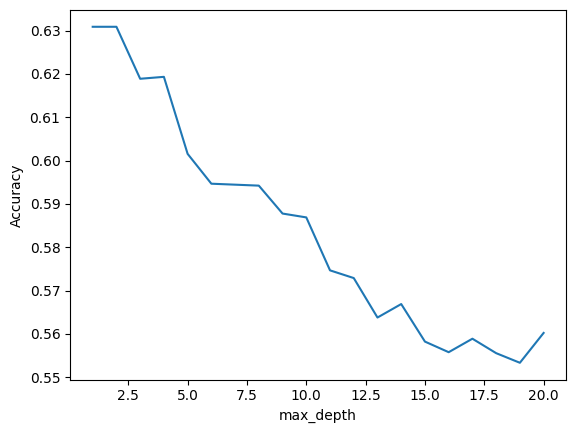

In [84]:
#-------------------
# Celda 6
#-------------------
max_depth_range = range(1, 21)
accuracy_scores_dt = []
f1_scores_dt = []

for depth in max_depth_range:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=1)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy_scores_dt.append(accuracy_score(y_test, y_pred))
    f1_scores_dt.append(f1_score(y_test, y_pred, average='weighted'))

best_depth_dt = max_depth_range[accuracy_scores_dt.index(max(accuracy_scores_dt))]

plt.plot(max_depth_range, accuracy_scores)
plt.xlabel('max_depth')
plt.ylabel('Accuracy')

print("Decision Tree Classifier:")
print("Best max_depth:", best_depth_dt)
print("Best Accuracy:", max(accuracy_scores_dt))
print("Best F1-Score:", f1_scores_dt[round(max(accuracy_scores_dt))])

clf = DecisionTreeClassifier(max_depth=4, random_state=1)  # se calibra max_depth en función de la gráfica y del reporte
clf.fit(X_train, y_train)

# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)

accuracy_lr = accuracy_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr, average='weighted')

print("\nLogistic Regression:")
print("Accuracy:", accuracy_lr)
print("F1-Score:", f1_lr)

### Punto 7 - Votación Mayoritaria
En la celda 7 elabore un esamble con la metodología de **Votación mayoritaria** compuesto por 300 muestras bagged donde:

-las primeras 100 muestras vienen de árboles de decisión donde max_depth tome un valor de su elección\
-las segundas 100 muestras vienen de árboles de decisión donde min_samples_leaf tome un valor de su elección\
-las últimas 100 muestras vienen de regresiones logísticas

Evalúe cada uno de los tres modelos de manera independiente utilizando las métricas de Accuracy y F1-Score, luego evalúe el ensamble de modelos y compare los resultados.

Nota:

Para este ensamble de 300 modelos, deben hacer votación mayoritaria. Esto lo pueden hacer de distintas maneras. La más "fácil" es haciendo la votación "manualmente", como se hace a partir del minuto 5:45 del video de Ejemplo práctico de emsablajes en Coursera. Digo que es la más fácil porque si hacen la votación mayoritaria sobre las 300 predicciones van a obtener lo que se espera.

Otra opción es: para cada uno de los 3 tipos de modelos, entrenar un ensamble de 100 modelos cada uno. Predecir para cada uno de esos tres ensambles y luego predecir como un ensamble de los 3 ensambles. La cuestión es que la votación mayoritaria al usar los 3 ensambles no necesariamente va a generar el mismo resultado que si hacen la votación mayoritaria directamente sobre los 300 modelos. Entonces, para los que quieran hacer esto, deben hacer ese último cálculo con cuidado.

Para los que quieran hacerlo como ensamble de ensambles, digo que se debe hacer el ensamble final con cuidado por lo siguiente. Supongamos que:

* para los 100 árboles del primer tipo, la votación mayoritaria es: 55% de los modelos predicen que la clase de una observación es "1"
* para los 100 árboles del segundo tipo, la votación mayoritaria es: 55% de los modelos predicen que la clase de una observación es "1"
* para las 100 regresiones logísticas, la votación mayoritaria es: 10% de los modelos predicen que la clase de una observación es "1"

Si se hace la votación mayoritaria de los 300 modelos, la predicción de esa observación debería ser: (100*55%+100*55%+100*10%)/300 = 40% de los modelos votan porque la predicción debería ser "1". Es decir, la predicción del ensamble es "0" (dado que menos del 50% de modelos predijo un 1).

Sin embargo, si miramos cada ensamble por separado, el primer ensamble predice "1", el segundo ensamble predice "1" y el último ensamble predice "0". Si hago votación mayoritaria sobre esto, la predicción va a ser "1", lo cual es distinto a si se hace la votación mayoritaria sobre los 300 modelos.

In [102]:
#-------------------
# Celda 7
#-------------------
# Creación de 100 muestras de bootstrap
n_estimators = 100
np.random.seed(123)

n_samples = X_train.shape[0]
samples = [np.random.choice(a=n_samples, size=n_samples, replace=True) for _ in range(n_estimators)]

#----------
# Entrenamiento de 100 modelos con las 100 muestras boostrap (max_depth=4)
#----------
np.random.seed(123)
seeds = np.random.randint(1, 10000, size=n_estimators)

trees = {}
for i in range(n_estimators):
    trees[i] = DecisionTreeClassifier(max_features="sqrt", max_depth=4, random_state=seeds[i])
    trees[i].fit(X_train.iloc[samples[i]], y_train.iloc[samples[i]])

# Predicción para los datos del set de test con cada modelo
y_pred_df = pd.DataFrame(index=X_test.index, columns=list(range(n_estimators)))
for i in range(n_estimators):
    y_pred_df.iloc[:, i] = trees[i].predict(X_test)

# Impresión de la cantidad de modelos que predijeron 1 para 10 observaciones
y_pred_df.sum(axis=1)[:10]

# Votación mayoritaria
y_pred = (y_pred_df.sum(axis=1) >= (n_estimators / 2)).astype(int)

# Desempeño al hacer votación mayoritaria
from sklearn import metrics
f1 = metrics.f1_score(y_pred, y_test)
accuracy = metrics.accuracy_score(y_pred, y_test)
print('Modelo 1:', 'F1:', f1, 'Acc.', accuracy)

final_trees = [value for key, value in trees.items()]

#----------
# Entrenamiento de 100 modelos con las 100 muestras boostrap (max_depth=0.001)
#----------

trees = {}
for i in range(n_estimators):
    trees[i] = DecisionTreeClassifier(max_features="sqrt", min_samples_leaf=0.001, random_state=seeds[i])
    trees[i].fit(X_train.iloc[samples[i]], y_train.iloc[samples[i]])

# Predicción para los datos del set de test con cada modelo
y_pred_df = pd.DataFrame(index=X_test.index, columns=list(range(n_estimators)))
for i in range(n_estimators):
    y_pred_df.iloc[:, i] = trees[i].predict(X_test)

# Impresión de la cantidad de modelos que predijeron 1 para 10 observaciones
y_pred_df.sum(axis=1)[:10]

# Votación mayoritaria
y_pred = (y_pred_df.sum(axis=1) >= (n_estimators / 2)).astype(int)

# Desempeño al hacer votación mayoritaria
from sklearn import metrics
f1 = metrics.f1_score(y_pred, y_test)
accuracy = metrics.accuracy_score(y_pred, y_test)
print('Modelo 2:', 'F1:', f1, 'Acc.', accuracy)

final_trees += [value for key, value in trees.items()]

#----------
# Entrenamiento de 100 modelos con regresión logística
#----------
# Listas para almacenar los modelos de regresión logística y las predicciones
logistic_models = []
predictions = []

# Entrenar 100 modelos de regresión logística
for _ in range(100):
    # Crear y entrenar un modelo de regresión logística
    model = LogisticRegression()
    model.fit(X_train, y_train)
    logistic_models.append(model)
    y_pred = model.predict(X_test)
    predictions.append(y_pred)

# Convertir la lista de predicciones en un array numpy
predictions_array = np.array(predictions)

# Calcular la moda de las predicciones para cada instancia
ensemble_predictions = np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=0, arr=predictions_array)

# Calcular la precisión y el F1-Score del ensamble
accuracy = metrics.accuracy_score(y_test, ensemble_predictions)
f1 = metrics.f1_score(y_test, ensemble_predictions, average='weighted')

print('Modelo 3:', 'F1:', f1, 'Acc.', accuracy)

#----------
# Resultados ensamble completo (300 modelos)
#----------
from sklearn.ensemble import VotingClassifier, BaggingClassifier

# Arboles max_depth=4
tree_depth4_bagging = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=4), n_estimators=100, random_state=42)

# Arboles min_samples_leaf=0.001
tree_min_leaf_bagging = BaggingClassifier(base_estimator=DecisionTreeClassifier(min_samples_leaf=0.001), n_estimators=100, random_state=42)

# Regresiones logisticas
logistic_regression_bagging = BaggingClassifier(base_estimator=LogisticRegression(max_iter=1000), n_estimators=100, random_state=42)

# Ensamblaje
voting_clf = VotingClassifier(estimators=[
    ('tree_depth4_bagging', tree_depth4_bagging),
    ('tree_min_leaf_bagging', tree_min_leaf_bagging),
    ('logistic_regression_bagging', logistic_regression_bagging)
], voting='hard')

# Train
voting_clf.fit(X_train, y_train)

# Predict
y_pred = voting_clf.predict(X_test)

# Resultados
accuracy = metrics.accuracy_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)
print('Modelo 4:', 'F1:', f1, 'Acc.', accuracy)

Modelo 1: F1: 0.6532258064516129 Acc. 0.656
Modelo 2: F1: 0.6586826347305389 Acc. 0.658
Modelo 3: F1: 0.613283836832224 Acc. 0.6133333333333333
Modelo 4: F1: 0.6396761133603239 Acc. 0.644


### Punto 8 - Votación Ponderada
En la celda 8 elabore un ensamble con la metodología de **Votación ponderada** compuesto por 300 muestras bagged para los mismos tres escenarios del punto 7. Evalúe los modelos utilizando las métricas de Accuracy y F1-Score

In [108]:
#-------------------
# Celda 8
#-------------------

# Definición del modelo BaggingClassifier de la libreria sklearn
clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_features="sqrt", max_depth=4, random_state=seeds[i]), n_estimators=100, bootstrap=True,
                        random_state=42, n_jobs=-1, oob_score=True)

# Predicción y desempeño al hacer votación mayoritaria
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
metrics.f1_score(y_pred, y_test), metrics.accuracy_score(y_pred, y_test)

# Obtención de los pesos alpha de cada modelo de acuerdo al error OOB
errors = np.zeros(clf.n_estimators)
y_pred_all_ = np.zeros((X_test.shape[0], clf.n_estimators))

for i in range(clf.n_estimators):
    oob_sample = ~clf.estimators_samples_[i]
    y_pred_ = clf.estimators_[i].predict(X_train.values[oob_sample])
    errors[i] = metrics.accuracy_score(y_pred_, y_train.values[oob_sample])
    y_pred_all_[:, i] = clf.estimators_[i].predict(X_test)

alpha = (1 - errors) / (1 - errors).sum()
y_pred = (np.sum(y_pred_all_ * alpha, axis=1) >= 0.5).astype(int)

# Desempeño al hacer votación ponderada
print(metrics.f1_score(y_pred, y_test), metrics.accuracy_score(y_pred, y_test))

# Definición del modelo BaggingClassifier de la libreria sklearn
clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_features="sqrt", min_samples_leaf=0.001, random_state=seeds[i]), n_estimators=100, bootstrap=True,
                        random_state=42, n_jobs=-1, oob_score=True)

# Predicción y desempeño al hacer votación mayoritaria
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
metrics.f1_score(y_pred, y_test), metrics.accuracy_score(y_pred, y_test)

# Obtención de los pesos alpha de cada modelo de acuerdo al error OOB
errors = np.zeros(clf.n_estimators)
y_pred_all_ = np.zeros((X_test.shape[0], clf.n_estimators))

for i in range(clf.n_estimators):
    oob_sample = ~clf.estimators_samples_[i]
    y_pred_ = clf.estimators_[i].predict(X_train.values[oob_sample])
    errors[i] = metrics.accuracy_score(y_pred_, y_train.values[oob_sample])
    y_pred_all_[:, i] = clf.estimators_[i].predict(X_test)

alpha = (1 - errors) / (1 - errors).sum()
y_pred = (np.sum(y_pred_all_ * alpha, axis=1) >= 0.5).astype(int)

# Desempeño al hacer votación ponderada
print(metrics.f1_score(y_pred, y_test), metrics.accuracy_score(y_pred, y_test))

0.6490872210953347 0.654
0.64280798348245 0.654


### Punto 9 - Comparación y análisis de resultados
En la celda 9 comente sobre los resultados obtenidos con las metodologías usadas en los puntos 7 y 8, compare los resultados y enuncie posibles ventajas o desventajas de cada una de ellas.

In [110]:
#-------------------
# Celda 9
#-------------------
El modelo ensamblado en el punto 7 tiene menor desempeño que los modelos de árboles de decisión que lo componen. Esto debido
al impacto que genera en el promedio la incorporación de las regresiones logisticas, las cuales tienen un menor accuracy y F1
que los árboles entrenados.

El modelo ensamblado en el punto 8 por otro lado, presenta un menor ajuste debido a la ponderación de los resultados, lo que
le modifica el peso de cada modelo y su participación de modelos con diferente poder explicativo.